In [1]:
# BIGDATA BOWL EDA
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels import robust


player_play = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/player_play.csv")
player_play


plays = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/plays.csv")
plays

plays_df = plays.dropna(subset=['pff_manZone'])
plays_df.columns



Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [2]:
plays_df['offenseFormation'].unique()

array(['EMPTY', 'SHOTGUN', 'PISTOL', 'SINGLEBACK', 'JUMBO', 'I_FORM',
       'WILDCAT', nan], dtype=object)

In [3]:
plays_df[plays_df['offenseFormation'] == 'EMPTY']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
12,2022091112,1674,(:35) (Shotgun) A.Rodgers pass deep left inten...,2,1,10,GB,MIN,GB,25,...,0,0.003262,-0.003262,-1.071627,True,NaN,NaN,0,Cover-2,Zone
17,2022102308,3304,"(2:57) (No Huddle, Shotgun) D.Mills pass incom...",4,2,1,HOU,LV,HOU,29,...,0,0.000007,-0.000007,-0.373242,True,NaN,NaN,0,Quarters,Zone
18,2022110607,3178,(9:59) (Shotgun) T.Heinicke pass short left to...,4,2,7,WAS,MIN,WAS,28,...,-2,-0.016307,0.016307,-0.708830,True,NaN,NaN,0,Quarters,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16075,2022103003,1462,(9:11) (Shotgun) J.Goff pass incomplete short ...,2,2,10,DET,MIA,MIA,43,...,0,-0.010526,0.010526,-0.817297,True,NaN,NaN,0,Cover-2,Zone
16083,2022091803,365,(8:05) (Shotgun) T.Lawrence pass short right t...,1,4,3,JAX,IND,IND,47,...,8,0.087903,-0.087903,3.664834,True,NaN,NaN,0,Cover-1,Man
16092,2022103006,557,(6:20) (Shotgun) A.Dalton pass short left to A...,1,1,10,NO,LV,NO,31,...,8,0.006818,-0.006818,0.586911,True,NaN,NaN,0,Cover-0,Man
16095,2022102308,3347,"(2:25) (No Huddle, Shotgun) D.Mills pass short...",4,1,10,HOU,LV,HOU,37,...,6,-0.000029,0.000029,0.133130,True,NaN,NaN,0,Cover-6 Right,Zone


In [4]:
tracking1 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv")
tracking2 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv")
tracking3 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv")
tracking4 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv")
tracking5 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv")
tracking6 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv")
tracking7 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv")
tracking8 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv")
tracking9 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv")

dfs = [] 
file_list = ["/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv"]
for file in file_list:
    data = pd.read_csv(file)
    dfs.append(data) 
tracking_df = pd.concat(dfs, ignore_index=True)
tracking_df

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.060000,28.550000,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.130000,28.570000,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.200000,28.590000,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.260000,28.620000,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.320000,28.650000,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59327368,2022110300,3579,NaN,football,37,AFTER_SNAP,2022-11-04 03:04:35.5,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,qb_kneel
59327369,2022110300,3579,NaN,football,38,AFTER_SNAP,2022-11-04 03:04:35.6,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN
59327370,2022110300,3579,NaN,football,39,AFTER_SNAP,2022-11-04 03:04:35.7,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN
59327371,2022110300,3579,NaN,football,40,AFTER_SNAP,2022-11-04 03:04:35.8,NaN,football,left,74.830002,29.870001,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
tracking_df[(tracking_df['gameId'] == 2022090800)
            & (tracking_df['playId'] == 80)]

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6691344,2022090800,80,35472.0,Rodger Saffold,1,BEFORE_SNAP,2022-09-09 00:24:24.5,76.0,BUF,left,80.340000,28.000000,0.10,0.08,0.01,259.36,302.41,NaN
6691345,2022090800,80,35472.0,Rodger Saffold,2,BEFORE_SNAP,2022-09-09 00:24:24.6,76.0,BUF,left,80.330000,28.000000,0.09,0.08,0.01,259.36,301.92,NaN
6691346,2022090800,80,35472.0,Rodger Saffold,3,BEFORE_SNAP,2022-09-09 00:24:24.7,76.0,BUF,left,80.340000,28.000000,0.07,0.06,0.01,260.31,304.57,NaN
6691347,2022090800,80,35472.0,Rodger Saffold,4,BEFORE_SNAP,2022-09-09 00:24:24.8,76.0,BUF,left,80.340000,28.000000,0.06,0.06,0.00,262.11,303.64,NaN
6691348,2022090800,80,35472.0,Rodger Saffold,5,BEFORE_SNAP,2022-09-09 00:24:24.9,76.0,BUF,left,80.330000,28.010000,0.06,0.06,0.01,262.73,306.47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694605,2022090800,80,NaN,football,138,AFTER_SNAP,2022-09-09 00:24:38.2,NaN,football,left,73.129997,42.470001,5.30,4.13,0.54,NaN,NaN,tackle
6694606,2022090800,80,NaN,football,139,AFTER_SNAP,2022-09-09 00:24:38.3,NaN,football,left,72.870003,42.910000,4.89,4.12,0.51,NaN,NaN,NaN
6694607,2022090800,80,NaN,football,140,AFTER_SNAP,2022-09-09 00:24:38.4,NaN,football,left,72.660004,43.330002,4.48,4.27,0.47,NaN,NaN,NaN
6694608,2022090800,80,NaN,football,141,AFTER_SNAP,2022-09-09 00:24:38.5,NaN,football,left,72.510002,43.700001,3.92,4.59,0.41,NaN,NaN,NaN


In [6]:
player_play[(player_play['inMotionAtBallSnap'] == True)] # 4572
player_play[(player_play['shiftSinceLineset'] == True)] # 3757
#player_play[(player_play['motionSinceLineset'] == True)] # 5822

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
190,2022090800,299,43399,LA,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,2022090800,299,53678,LA,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,2022090800,721,42448,BUF,0,0,0,0,0,0,...,1.0,HITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,2022090800,721,44985,BUF,0,0,0,0,0,0,...,1.0,SLANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,2022090800,721,47857,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354531,2022110700,3560,42514,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354553,2022110700,3581,42469,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354597,2022110700,3630,42514,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354605,2022110700,3630,54604,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Game: 2022090800
## Play: 80 

In [8]:
frame = 88
# snap = 88, last frame = 142 
play80 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 80)]
                        #   & (tracking_df['frameType'] == 'SNAP')]

play80_ball = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 80) 
                          & (tracking_df['frameId'] == frame) 
                          & (tracking_df['club'] == 'football')]

play80_team1 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 80) 
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'BUF')]

play80_team2 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 80)
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'LA')]

In [9]:
play80[(play80['frameId'] == 30) & (play80['club'] == 'LA')]

play80[(play80['frameId'] == 110) & (play80['club'] == 'BUF')]

play80[(play80['frameId'] == 110)]
# 4 D-Line players : Aaron Donald, Greg Gaines, A'Shawn Robinson, Leonard Floyd

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6691453,2022090800,80,35472.0,Rodger Saffold,110,AFTER_SNAP,2022-09-09 00:24:35.4,76.0,BUF,left,81.970000,26.70,2.20,1.16,0.22,199.90,142.77,NaN
6691595,2022090800,80,38577.0,Bobby Wagner,110,AFTER_SNAP,2022-09-09 00:24:35.4,45.0,LA,left,72.030000,22.97,1.29,1.80,0.13,34.50,275.42,NaN
6691737,2022090800,80,41239.0,Aaron Donald,110,AFTER_SNAP,2022-09-09 00:24:35.4,99.0,LA,left,85.830000,30.25,4.73,2.94,0.48,143.85,129.08,NaN
6691879,2022090800,80,42392.0,Mitch Morse,110,AFTER_SNAP,2022-09-09 00:24:35.4,60.0,BUF,left,81.780000,28.13,0.32,2.13,0.04,243.98,57.65,NaN
6692021,2022090800,80,42489.0,Stefon Diggs,110,AFTER_SNAP,2022-09-09 00:24:35.4,14.0,BUF,left,71.160000,22.30,6.04,2.14,0.61,264.78,271.22,NaN
6692163,2022090800,80,42816.0,Troy Hill,110,AFTER_SNAP,2022-09-09 00:24:35.4,2.0,LA,left,66.590000,9.74,3.55,2.22,0.35,5.82,282.99,NaN
6692305,2022090800,80,43294.0,Jalen Ramsey,110,AFTER_SNAP,2022-09-09 00:24:35.4,5.0,LA,left,72.270000,43.34,2.22,0.76,0.22,126.39,18.64,NaN
6692447,2022090800,80,43298.0,Leonard Floyd,110,AFTER_SNAP,2022-09-09 00:24:35.4,54.0,LA,left,86.180000,34.48,2.63,6.41,0.30,218.14,101.69,NaN
6692589,2022090800,80,43335.0,A'Shawn Robinson,110,AFTER_SNAP,2022-09-09 00:24:35.4,94.0,LA,left,81.780000,24.30,2.00,1.87,0.20,82.70,115.12,NaN
6692731,2022090800,80,44875.0,Dion Dawkins,110,AFTER_SNAP,2022-09-09 00:24:35.4,73.0,BUF,left,82.530000,24.81,2.18,1.63,0.22,240.28,109.04,NaN


In [10]:
frame_30_data = play80[play80['frameId'] == 30]

la_players = frame_30_data[frame_30_data['club'] == 'LA']
buf_players = frame_30_data[frame_30_data['club'] == 'BUF']

la_targets = ['Aaron Donald', 'Greg Gaines', 'A\'Shawn Robinson', 'Leonard Floyd']
la_target_data = la_players[la_players['displayName'].isin(la_targets)]

closest_players = {}

for _, la_player in la_target_data.iterrows():
    la_x, la_y = la_player['x'], la_player['y']
    la_name = la_player['displayName']
    
    buf_players['distance'] = np.sqrt((buf_players['x'] - la_x)**2 + (buf_players['y'] - la_y)**2)
    
    closest_buf_player = buf_players.loc[buf_players['distance'].idxmin()]
    
    closest_players[la_name] = {
        'closest_player': closest_buf_player['displayName'],
        'distance': closest_buf_player['distance']
    }

for la_player, info in closest_players.items():
    print(f"{la_player} -> Closest BUF player: {info['closest_player']} (Distance: {info['distance']:.2f} yards)")


Aaron Donald -> Closest BUF player: Spencer Brown (Distance: 2.69 yards)
Leonard Floyd -> Closest BUF player: Dawson Knox (Distance: 2.97 yards)
A'Shawn Robinson -> Closest BUF player: Dion Dawkins (Distance: 2.51 yards)
Greg Gaines -> Closest BUF player: Mitch Morse (Distance: 1.69 yards)


/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057/1473682348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buf_players['distance'] = np.sqrt((buf_players['x'] - la_x)**2 + (buf_players['y'] - la_y)**2)
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057/1473682348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buf_players['distance'] = np.sqrt((buf_players['x'] - la_x)**2 + (buf_players['y'] - la_y)**2)
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057

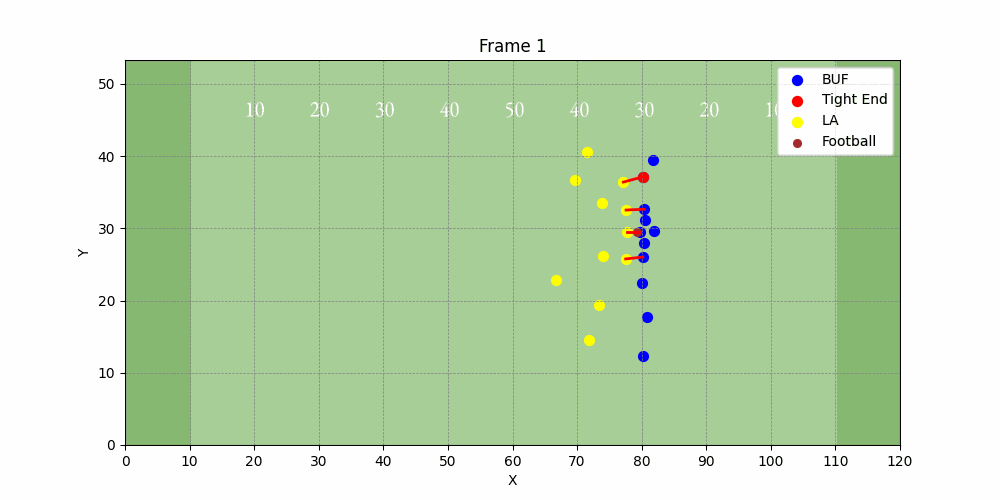

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from IPython.display import display, Image
from scipy.spatial import distance

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

gif_frames = []
la_targets = ['Aaron Donald', 'Greg Gaines', "A'Shawn Robinson", 'Leonard Floyd']


for frame_id in sorted(play80['frameId'].unique()):
    frame_data = play80[play80['frameId'] == frame_id]

    la_players = frame_data[(frame_data['club'] == 'LA') & (frame_data['displayName'].isin(la_targets))]
    buf_players = frame_data[frame_data['club'] == 'BUF']
    tightend_data = frame_data[(frame_data['displayName'] == 'Dawson Knox')]

    
    fig, ax = plt.subplots(figsize=(10, 5))  
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')

    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.8)

    
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5)#, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == 'BUF']['x'], 
               frame_data[frame_data['club'] == 'BUF']['y'], 
               color='blue', s=50, label='BUF')
    ax.scatter(tightend_data['x'], tightend_data['y'], 
               color='red', s=50, label='Tight End')
    ax.scatter(frame_data[frame_data['club'] == 'LA']['x'], 
               frame_data[frame_data['club'] == 'LA']['y'], 
               color='yellow', s=50, label='LA')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=30, label='Football', marker='o')
    
    for _, la_player in la_players.iterrows():
        distances = buf_players.apply(
            lambda buf_player: distance.euclidean(
                (la_player['x'], la_player['y']),
                (buf_player['x'], buf_player['y'])
            ),
            axis=1
        )
        closest_buf_index = distances.idxmin()
        closest_buf_player = buf_players.loc[closest_buf_index]

        ax.plot(
            [la_player['x'], closest_buf_player['x']], 
            [la_player['y'], closest_buf_player['y']], 
            color='red', linewidth=2
        )
    
    
    ax.legend(loc='upper right')
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    
    gif_frames.append(image)
    
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))

## Game: 2022090800 
## Play: 299

In [12]:
frame = 153
# snap = 153, last frame = 200

play299 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 299)]
                        #   & (tracking_df['frameType'] == 'SNAP')]

play299_ball = tracking_df[(tracking_df['gameId'] == 2022090800) 
                          & (tracking_df['playId'] == 299) 
                          & (tracking_df['frameId'] == frame) 
                          & (tracking_df['club'] == 'football')]

play299_team1 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 299) 
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'BUF')]

play299_team2 = tracking_df[(tracking_df['gameId'] == 2022090800) 
                           & (tracking_df['playId'] == 299)
                           & (tracking_df['frameId'] == frame) 
                           & (tracking_df['club'] == 'LA')]

In [21]:
#play299[(play299['frameId'] == 30) & (play299['club'] == 'LA')]

play299[(play299['frameId'] == 127) & (play299['club'] == 'BUF')]

#play299[(play299['frameId'] == 153)]
# 4 LA D-Line players : Aaron Donald, Greg Gaines, A'Shawn Robinson, Leonard Floyd
# 4 BUF D-Line players : 'Tremaine Edmunds', 'Von Miller', 'DaQuan Jones', 'Ed Oliver'

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
6716878,2022090800,299,37075.0,Von Miller,127,BEFORE_SNAP,2022-09-09 00:33:28.4,40.0,BUF,right,27.39,28.34,0.04,0.03,0.02,268.68,238.99,NaN
6717078,2022090800,299,40107.0,Micah Hyde,127,BEFORE_SNAP,2022-09-09 00:33:28.4,23.0,BUF,right,40.00,18.67,0.26,0.73,0.02,276.19,191.26,NaN
6717278,2022090800,299,40166.0,Jordan Poyer,127,BEFORE_SNAP,2022-09-09 00:33:28.4,21.0,BUF,right,37.91,31.77,0.72,0.45,0.08,270.50,134.00,NaN
6717678,2022090800,299,41341.0,DaQuan Jones,127,BEFORE_SNAP,2022-09-09 00:33:28.4,92.0,BUF,right,26.95,21.14,0.01,0.01,0.01,295.31,194.96,NaN
6718478,2022090800,299,44976.0,Matt Milano,127,BEFORE_SNAP,2022-09-09 00:33:28.4,58.0,BUF,right,29.81,19.74,1.37,1.44,0.14,314.68,352.46,NaN
6718678,2022090800,299,46085.0,Tremaine Edmunds,127,BEFORE_SNAP,2022-09-09 00:33:28.4,49.0,BUF,right,30.99,22.89,0.05,0.04,0.02,268.62,354.30,NaN
6719278,2022090800,299,46190.0,Taron Johnson,127,BEFORE_SNAP,2022-09-09 00:33:28.4,7.0,BUF,right,30.29,27.70,0.05,0.04,0.01,264.38,152.19,NaN
6719678,2022090800,299,47792.0,Ed Oliver,127,BEFORE_SNAP,2022-09-09 00:33:28.4,91.0,BUF,right,27.19,24.73,0.01,0.01,0.00,269.61,286.35,NaN
6720278,2022090800,299,52647.0,Dane Jackson,127,BEFORE_SNAP,2022-09-09 00:33:28.4,30.0,BUF,right,28.34,13.26,0.69,0.94,0.06,304.09,107.41,NaN
6720478,2022090800,299,53459.0,Gregory Rousseau,127,BEFORE_SNAP,2022-09-09 00:33:28.4,50.0,BUF,right,27.15,19.40,0.00,0.00,0.00,288.24,345.05,NaN


In [23]:
frame_30_data = play299[play299['frameId'] == 30]

la_players = frame_30_data[frame_30_data['club'] == 'LA']
buf_players = frame_30_data[frame_30_data['club'] == 'BUF']

buf_targets = ['Gregory Rousseau', 'Von Miller', 'DaQuan Jones', 'Ed Oliver']
buf_target_data = buf_players[buf_players['displayName'].isin(buf_targets)]

closest_players = {}

for _, buf_player in buf_target_data.iterrows():
    buf_x, buf_y = buf_player['x'], buf_player['y']
    buf_name = buf_player['displayName']
    
    la_players['distance'] = np.sqrt((la_players['x'] - buf_x)**2 + (la_players['y'] - buf_y)**2)
    
    closest_la_player = la_players.loc[la_players['distance'].idxmin()]
    
    closest_players[buf_name] = {
        'closest_player': closest_la_player['displayName'],
        'distance': closest_la_player['distance']
    }

for la_player, info in closest_players.items():
    print(f"{la_player} -> Closest LA player: {info['closest_player']} (Distance: {info['distance']:.2f} yards)")


Von Miller -> Closest LA player: Joseph Noteboom (Distance: 3.87 yards)
DaQuan Jones -> Closest LA player: Brian Allen (Distance: 1.70 yards)
Ed Oliver -> Closest LA player: David Edwards (Distance: 2.74 yards)
Gregory Rousseau -> Closest LA player: Rob Havenstein (Distance: 2.70 yards)


/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057/2005283754.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_players['distance'] = np.sqrt((la_players['x'] - buf_x)**2 + (la_players['y'] - buf_y)**2)
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057/2005283754.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_players['distance'] = np.sqrt((la_players['x'] - buf_x)**2 + (la_players['y'] - buf_y)**2)
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_54057/2

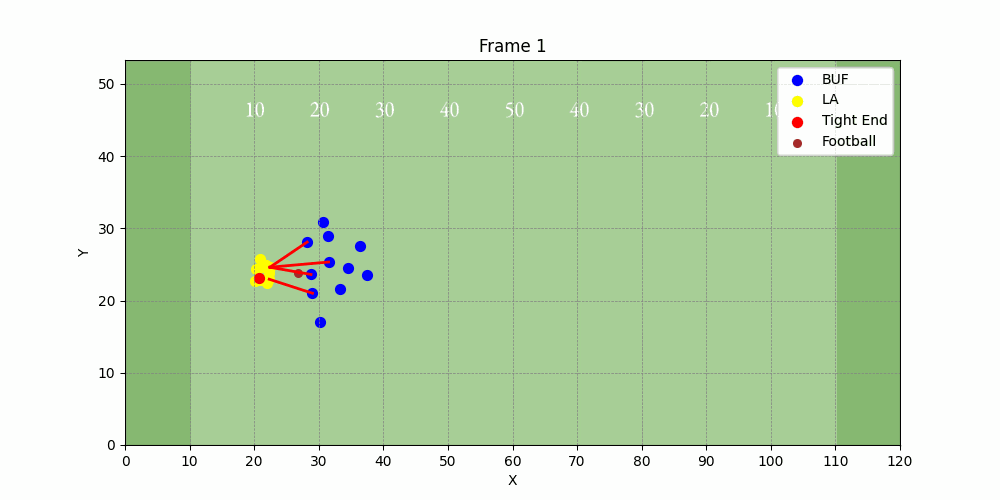

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from IPython.display import display, Image
from scipy.spatial import distance

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

gif_frames = []
buf_targets = ['Gregory Rousseau', 'Von Miller', 'DaQuan Jones', 'Ed Oliver']


for frame_id in sorted(play299['frameId'].unique()):
    frame_data = play299[play299['frameId'] == frame_id]

    la_players = frame_data[(frame_data['club'] == 'LA')]
    buf_players = frame_data[(frame_data['club'] == 'BUF') & (frame_data['displayName'].isin(buf_targets))]
    tightend_data = frame_data[(frame_data['displayName'] == 'Tyler Higbee')]

    
    fig, ax = plt.subplots(figsize=(10, 5))  
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')

    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.8)

    
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5)#, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == 'BUF']['x'], 
               frame_data[frame_data['club'] == 'BUF']['y'], 
               color='blue', s=50, label='BUF')
    ax.scatter(frame_data[frame_data['club'] == 'LA']['x'], 
               frame_data[frame_data['club'] == 'LA']['y'], 
               color='yellow', s=50, label='LA')
    ax.scatter(tightend_data['x'], tightend_data['y'], 
               color='red', s=50, label='Tight End')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=30, label='Football', marker='o')
    
    for _, buf_player in buf_players.iterrows():
        distances = la_players.apply(
            lambda la_player: distance.euclidean(
                (buf_player['x'], buf_player['y']),
                (la_player['x'], la_player['y'])
            ),
            axis=1
        )
        closest_la_index = distances.idxmin()
        closest_la_player = la_players.loc[closest_la_index]

        ax.plot(
            [buf_player['x'], closest_la_player['x']], 
            [buf_player['y'], closest_la_player['y']], 
            color='red', linewidth=2
        )
    
    
    ax.legend(loc='upper right')
    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    
    gif_frames.append(image)
    
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))